In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import ggplot as gg
import pandas as pd
import numpy as np
from sklearn.lda import LDA

%matplotlib inline
py.init_notebook_mode(connected=True)

C:\ProgramData\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning:

pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp

C:\ProgramData\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning:

The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\lda.py:6: DeprecationWarning:

lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19



In [3]:
scores = pd.read_csv('scores_3.csv', index_col=0)
scores.index = list(range(len(scores)))
ratings = pd.read_csv("C:\\Users\\ll299\\Documents\\python_nctta_rating\\current_rating.csv", index_col=0)
ratings['current_rating'] = ratings['current_rating'].apply(lambda x: int(x.replace('[','').replace(']','')))
ratings['player_id'] = ratings['player_id'].apply(lambda x: int(x.replace('[','').replace(']','')))

In [4]:
#apply PauTu method to drop the outliers. 
import functools
def pautu(score,wlratio_mean, wlratio_std):
    mean = wlratio_mean[score['Ll']-1,score['Wl']-1]
    std = wlratio_std[score['Ll']-1, score['Wl']-1]
    return (mean-2.58*std<score['win_ratio']<mean+2.58*std)

In [5]:
# calculate the mean and std of w_L ratio of different levels. 
wlratio_mean = np.zeros((10,10))
wlratio_std = np.zeros((10,10))
def wlratio(scores_e, wlratio_mean, wlratio_std):
    for i in range(10):
        for j in range(10):
            wr = scores_e[(scores_e['Ll']==i+1) & (scores_e['Wl']==j+1)]['win_ratio']
            lr = 1-scores_e[(scores_e['Ll']==j+1) & (scores_e['Wl']==i+1)]['win_ratio']
            w_r_l=wr.append(lr)
            wlratio_mean[i,j]=np.mean(w_r_l)
            wlratio_std[i,j]=np.sqrt(np.var(w_r_l))
wlratio(scores, wlratio_mean, wlratio_std)    

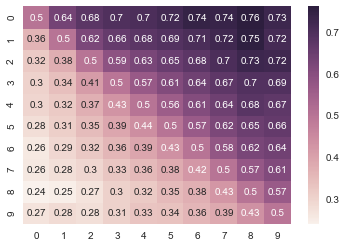

In [57]:
sns.heatmap(wlratio_mean, annot=True)

In [39]:
np.save('wlratio_mean',wlratio_mean)

In [7]:
scores_new = scores
for i in range(2):
    wlratio(scores_new, wlratio_mean, wlratio_std)  
    pautu_new = functools.partial(pautu, wlratio_mean = wlratio_mean, wlratio_std = wlratio_std)
    drop_list_temp = scores_new.apply(pautu_new, axis=1)
    scores_new = scores_new[drop_list_temp]

In [8]:
outliers_index = np.setdiff1d(np.array(scores.index),np.array(scores_new.index))

In [9]:
scores.loc[outliers_index]

,Date,Loser_id,Meet,Winner_id,l1,l2,l3,l4,l5,w1,...,w4,w5,wl,Lr,Wr,Wpoints,Lpoints,win_ratio,Ll,Wl
44,2002-03-02,62,Lower New England Division Meet,397,2,2,3,0,0,11,...,0,0,3,1377.0,1838.0,33,7,0.825000,4,6
122,2006-01-29,2121,Florida Division,181,3,2,1,0,0,11,...,0,0,3,1215.0,1662.0,33,6,0.846154,3,5
157,2003-03-30,198,NCTTA TEAM CHAMPIONSHIPS,272,4,3,3,0,0,11,...,0,0,3,1652.0,1963.0,33,10,0.767442,5,6
227,2006-01-29,2565,Florida Division,220,2,2,4,0,0,11,...,0,0,3,1616.0,1855.0,33,8,0.804878,5,6
247,2002-11-16,220,Florida Division Meet,425,9,6,9,0,0,11,...,0,0,3,1855.0,1562.0,33,24,0.578947,6,4
248,2002-11-16,220,Florida Division Meet,827,6,8,2,0,0,11,...,0,0,3,1855.0,1566.0,33,16,0.673469,6,4
250,2002-02-24,220,Florida Division Meet,431,2,2,2,0,0,11,...,0,0,3,1855.0,2022.0,33,6,0.846154,6,7
252,2001-10-14,220,Florida Division Meet,432,4,6,2,0,0,11,...,0,0,3,1855.0,1821.0,33,12,0.733333,6,6
278,2004-10-30,1413,Florida Division,231,2,5,1,0,0,11,...,0,0,3,1632.0,1832.0,33,8,0.804878,5,6
288,2003-03-02,1016,Florida Division Meet,234,6,4,3,0,0,11,...,0,0,3,1707.0,1289.0,33,13,0.717391,5,3


## Get w/l ratio for players

In [10]:
def level(rating):
    level_range = [0,500,1000,1300,1600,1800,2000,2200,2400,2550,2800]
    for i in range(10):
        if level_range[i]<=rating<level_range[i+1]:
            return i+1

In [11]:
def get_info(w):
    dict_list = []
    for i in w.index.levels[0]:
        d = w.loc[i].to_dict()
        d['id'] = i
        dict_list.append(d)
    return pd.DataFrame.from_records(dict_list, index='id')

In [12]:
ratings.set_index('player_id', inplace=True)

In [13]:
def get_players_history_info(scores_new, ratings):
    l=pd.Series(1-scores_new.groupby(['Loser_id','Wl']).mean().win_ratio)
    lc = scores_new.groupby(['Loser_id','Wl']).count().win_ratio
    w = pd.Series(scores_new.groupby(['Winner_id','Ll']).mean().win_ratio)
    wc = scores_new.groupby(['Winner_id','Ll']).count().win_ratio
    df_l = get_info(l*lc)
    df_w = get_info(w*wc)
    df_lc = get_info(lc)
    df_wc = get_info(wc)

    dfm_l = ratings.merge(right = df_l, how='left', left_index=True, right_index=True, copy=True)
    dfm_l.fillna(0, inplace = True)
    dfm_lc = ratings.merge(right = df_lc, how='left', left_index=True, right_index=True, copy=True)
    dfm_lc.fillna(0, inplace = True)
    dfm_w = ratings.merge(right = df_w, how='left', left_index=True, right_index=True, copy=True)
    dfm_w.fillna(0, inplace = True)
    dfm_wc = ratings.merge(right = df_wc, how='left', left_index=True, right_index=True, copy=True)
    dfm_wc.fillna(0, inplace = True)

    players_history = (dfm_l+dfm_w)/(dfm_wc+dfm_lc)
    players_history.fillna(0,inplace=True)

    players_history['current_rating']= ratings

    players_history = players_history[[1,2,3,4,5,6,7,8,9,10,'current_rating']]

    players_history['level']=players_history['current_rating'].apply(level)
    return players_history

In [14]:
players_history = get_players_history_info(scores_new, ratings)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4814: RuntimeWarning:

'<' not supported between instances of 'numpy.ndarray' and 'str', sort order is undefined for incomparable objects



In [15]:
players_history_for_outlier = get_players_history_info(scores, ratings)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4814: RuntimeWarning:

'<' not supported between instances of 'numpy.ndarray' and 'str', sort order is undefined for incomparable objects



In [16]:
# get labels
labels = []
for i in range(10):
    labels.append(players_history[i+1]!=0)
labels = np.array(labels)    

In [17]:
def labels_gene(*p):
    s = np.ones(len(labels[1,:]))
    q = np.array(p)-1
    for i in labels[q,:]:
        s *=i
    return s.astype(bool)

In [18]:
def labels_player(player):
    labels = [] 
    for i in range(1,11):
        if player.loc[i] != 0:
            labels.append(i)
    return labels

In [19]:
def normal_lda(line, players_history):
    # What levels have data for the player
    p = labels_player(line)
    if p == []:
        return {'num_records':0, 'lda_score':0, 'level_revaluated':0}
    # select 'similar' players from the data frame
    indexs = labels_gene(*p)
    num_records = sum(indexs)
    X = players_history.loc[indexs,p]
    Y = players_history.loc[indexs]['level']
    clf1 = LDA(solver='lsqr', shrinkage='auto').fit(X, Y)
    lda_score = clf1.score(X,Y)
    level_revaluated = clf1.predict(line.loc[p])[0]
    return{'num_records':num_records, 'lda_score':lda_score, 'level_revaluated':level_revaluated}

In [22]:
import warnings
warnings.simplefilter('ignore')
dict_lda = players_history.apply(normal_lda, axis=1, args = [players_history])

In [23]:
df_nlda = pd.DataFrame.from_records(dict_lda.values)

In [24]:
players_history['index'] = list(range(len(players_history)))

In [25]:
df_nlda_o = players_history.merge(df_nlda, how='inner', left_on='index', right_index=True)

In [26]:
del df_nlda_o['index']

In [27]:
df_nlda_o['level_change'] = np.abs(df_nlda_o['level']-df_nlda_o['level_revaluated'])

In [28]:
df_nlda_o.to_csv('nlda.csv')

In [29]:
e = df_nlda_o[df_nlda_o['level_change']>=2].index

In [30]:
labels_player(df_nlda_o.loc[e[1]])

[]

In [31]:
# visualization copy
def plot_average_players(levels, player_id, players_history):
    traces=[]
# add player's win_ratio line
    if player_id != 0:
        player = players_history.loc[player_id]
        levels = list(np.array(player[['level', 'level_revaluated']],dtype=int))
        if player['level_revaluated'] == 0:
            levels[1]=levels[0]
        columns = labels_player(player)
        trace_p = go.Scatter(
            x= columns,
            y= player.loc[columns],
            mode = 'lines+markers',
            line = dict(
                color = 'rgb(22, 96, 167)',
                width = 4),
            name = 'player '+str(player_id)
        )
        traces.append(trace_p)
# highlight selected levels or players levels        
    if levels != [0]:
        gray = 'rgba(204,204,204,1)'
        red = 'rgba(222,45,38,0.8)'
        for i in range(1,11):
            color = gray
            str_name = 'level '+str(i)
            if i in levels:
                color = red
                if player_id != 0 and i == levels[1]:
                    str_name = 'level ' + str(i) + ' revaluated'
                if player_id != 0 and i == levels[0]:
                    str_name = 'level ' + str(i) + ' original'

            trace = go.Scatter(
                x = list(range(1,11)),
                y = wlratio_mean[:,i-1],
                mode = 'lines+markers',
                line = dict(
                    color = color,
                    width = 4),
                name = str_name
            )
            traces.append(trace)
        for i in levels:
            trace = go.Scatter(
                x=[i],
                y=[wlratio_mean[i-1,i-1]],
                mode = 'markers',
                marker = dict(
                    color = red,
                    size = 20),
                showlegend=False,
                name = 'level'+str(i)
            )
            traces.append(trace)
    else:
        for i in range(1,11):
            trace = go.Scatter(
                x = list(range(1,11)),
                y = wlratio_mean[:,i-1],
                mode = 'lines+markers',
                line = dict(
                    width = 4),
                name = 'level'+str(i))
            traces.append(trace)
    layout = go.Layout(
        xaxis = dict(
            title = 'Competator\'s Level'
        ),
        yaxis = dict(
            title = 'Win Raito' 
        ),
        title = "Average Win Ratio for Players in All Levels",
        bargap = 0,
        bargroupgap = 0.1
    )        
    data = traces
    
    fig = go.Figure(data = data, layout = layout)
    py.iplot(fig)                   

In [54]:
df_nlda_o.loc[3016]

1                      0.000000
2                      0.767442
3                      0.000000
4                      0.000000
5                      0.000000
6                      0.000000
7                      0.000000
8                      0.000000
9                      0.000000
10                     0.000000
current_rating      1157.000000
level                  3.000000
lda_score              0.457071
level_revaluated       4.000000
num_records         7955.000000
level_change           1.000000
Name: 3016, dtype: float64

In [32]:
df_nlda_o.loc[e[30]]

1                      0.000000
2                      0.000000
3                      0.000000
4                      0.480000
5                      0.557143
6                      0.000000
7                      0.000000
8                      0.000000
9                      0.000000
10                     0.000000
current_rating      1811.000000
level                  6.000000
lda_score              0.531694
level_revaluated       4.000000
num_records         3660.000000
level_change           2.000000
Name: 1135, dtype: float64

In [58]:
plot_average_players([0],0, df_nlda_o)